In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
riskData = pd.read_csv('clean-train-data.csv')
riskData.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Risk_Class
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,No Risk
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,No Risk
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,No Risk
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Risk
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Risk


# Classification Trees

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

### Simple Decision Tree

We have chosen to do a simple decision tree for `income` as income has the largest range and variance.

Train set :  (189000, 1) (189000, 1)
Test set:  (63000, 1) (63000, 1)


[Text(334.8, 543.6, 'Income <= 11272.0\ngini = 0.216\nsamples = 189000\nvalue = [165762, 23238]\nclass = No Risk'),
 Text(167.4, 326.16, 'Income <= 10492.5\ngini = 0.5\nsamples = 84\nvalue = [43, 41]\nclass = No Risk'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = No Risk'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.38\nsamples = 55\nvalue = [14, 41]\nclass = Risk'),
 Text(502.20000000000005, 326.16, 'Income <= 1148469.0\ngini = 0.215\nsamples = 188916\nvalue = [165719, 23197]\nclass = No Risk'),
 Text(418.5, 108.72000000000003, 'gini = 0.24\nsamples = 21301\nvalue = [18336, 2965]\nclass = No Risk'),
 Text(585.9, 108.72000000000003, 'gini = 0.212\nsamples = 167615\nvalue = [147383, 20232]\nclass = No Risk')]

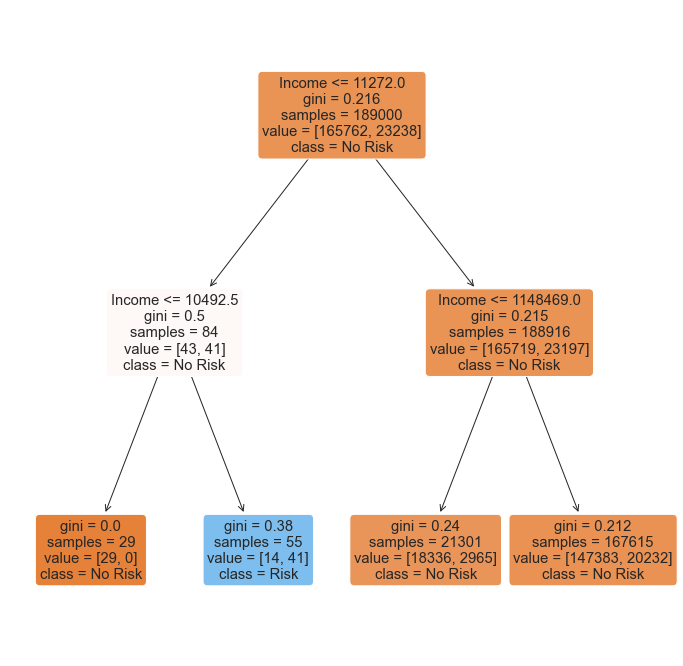

In [4]:
x = pd.DataFrame(riskData['Income'])
y = pd.DataFrame(riskData['Risk_Class'])

X_train, X_vali, y_train, y_vali = train_test_split(x,y,test_size = 0.25)

print("Train set : ", y_train.shape, X_train.shape)
print("Test set: ",y_vali.shape, X_vali.shape)


dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)



f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"])

### Goodness of Fit of the Model

Train Data
Accuracy  :	 0.8771904761904762

TPR Train :	 0.0017643514932438248
TNR Train :	 0.9999155415595854

FPR Train :	 8.445844041457029e-05
FNR Train :	 0.9982356485067562

Test Data
Accuracy  :	 0.8769523809523809

TPR Test :	 0.0015467904098994587
TNR Test :	 0.9998913869881612

FPR Test :	 0.0001086130118388183
FNR Test :	 0.9984532095901005



Text(0.5, 1.0, 'Test')

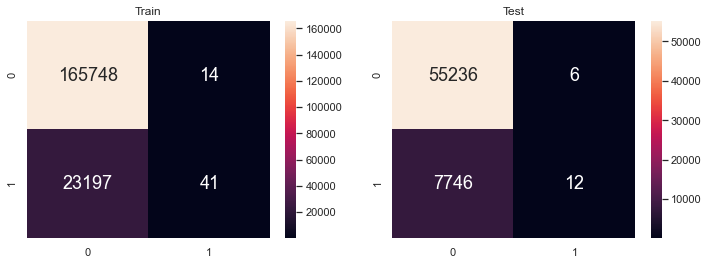

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################validation#####################################################

# Predict the Response corresponding to Predictors
y_vali_pred = dectree.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

# Attempt 1 at creating a model
### Multi-Variate Classfication Tree without upsampling

In [6]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [7]:
# OneHotEncoding of categorical predictors (not the response)
riskData_cat = riskData[['Married/Single','House_Ownership','Car_Ownership']]
ohe.fit(riskData_cat)
riskData_cat_ohe = pd.DataFrame(ohe.transform(riskData_cat).toarray(), 
                                  columns=ohe.get_feature_names(riskData_cat.columns))
                                    #columns=ohe.get_feature_names_out(creditData_cat.columns))
# Check the encoded variables
riskData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Married/Single_married        252000 non-null  float64
 1   Married/Single_single         252000 non-null  float64
 2   House_Ownership_norent_noown  252000 non-null  float64
 3   House_Ownership_owned         252000 non-null  float64
 4   House_Ownership_rented        252000 non-null  float64
 5   Car_Ownership_no              252000 non-null  float64
 6   Car_Ownership_yes             252000 non-null  float64
dtypes: float64(7)
memory usage: 13.5 MB


In [8]:
#make a new dataframe that combines numeric and categorical
riskData_num=pd.DataFrame(riskData[["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]])
combined_data = pd.concat([riskData_num, riskData_cat_ohe], 
                           sort = False, axis = 1).reindex(index=riskData_cat_ohe.index)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        252000 non-null  int64  
 1   Age                           252000 non-null  int64  
 2   Experience                    252000 non-null  int64  
 3   CURRENT_JOB_YRS               252000 non-null  int64  
 4   CURRENT_HOUSE_YRS             252000 non-null  int64  
 5   Married/Single_married        252000 non-null  float64
 6   Married/Single_single         252000 non-null  float64
 7   House_Ownership_norent_noown  252000 non-null  float64
 8   House_Ownership_owned         252000 non-null  float64
 9   House_Ownership_rented        252000 non-null  float64
 10  Car_Ownership_no              252000 non-null  float64
 11  Car_Ownership_yes             252000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 23.1 M

[Text(777.0666666666666, 1565.568, 'Experience <= 2.5\ngini = 0.217\nsamples = 189000\nvalue = [165636, 23364]\nclass = No Risk'),
 Text(297.59999999999997, 1217.664, 'Income <= 11715.0\ngini = 0.267\nsamples = 25340\nvalue = [21322, 4018]\nclass = No Risk'),
 Text(132.26666666666665, 869.76, 'House_Ownership_owned <= 0.5\ngini = 0.191\nsamples = 28\nvalue = [3, 25]\nclass = Risk'),
 Text(66.13333333333333, 521.856, 'gini = 0.198\nsamples = 27\nvalue = [3, 24]\nclass = Risk'),
 Text(198.39999999999998, 521.856, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risk'),
 Text(462.9333333333333, 869.76, 'Age <= 27.5\ngini = 0.266\nsamples = 25312\nvalue = [21319, 3993]\nclass = No Risk'),
 Text(330.66666666666663, 521.856, 'CURRENT_HOUSE_YRS <= 11.5\ngini = 0.334\nsamples = 3335\nvalue = [2629, 706]\nclass = No Risk'),
 Text(264.5333333333333, 173.952, 'gini = 0.413\nsamples = 1248\nvalue = [885, 363]\nclass = No Risk'),
 Text(396.79999999999995, 173.952, 'gini = 0.275\nsamples = 2087\nva

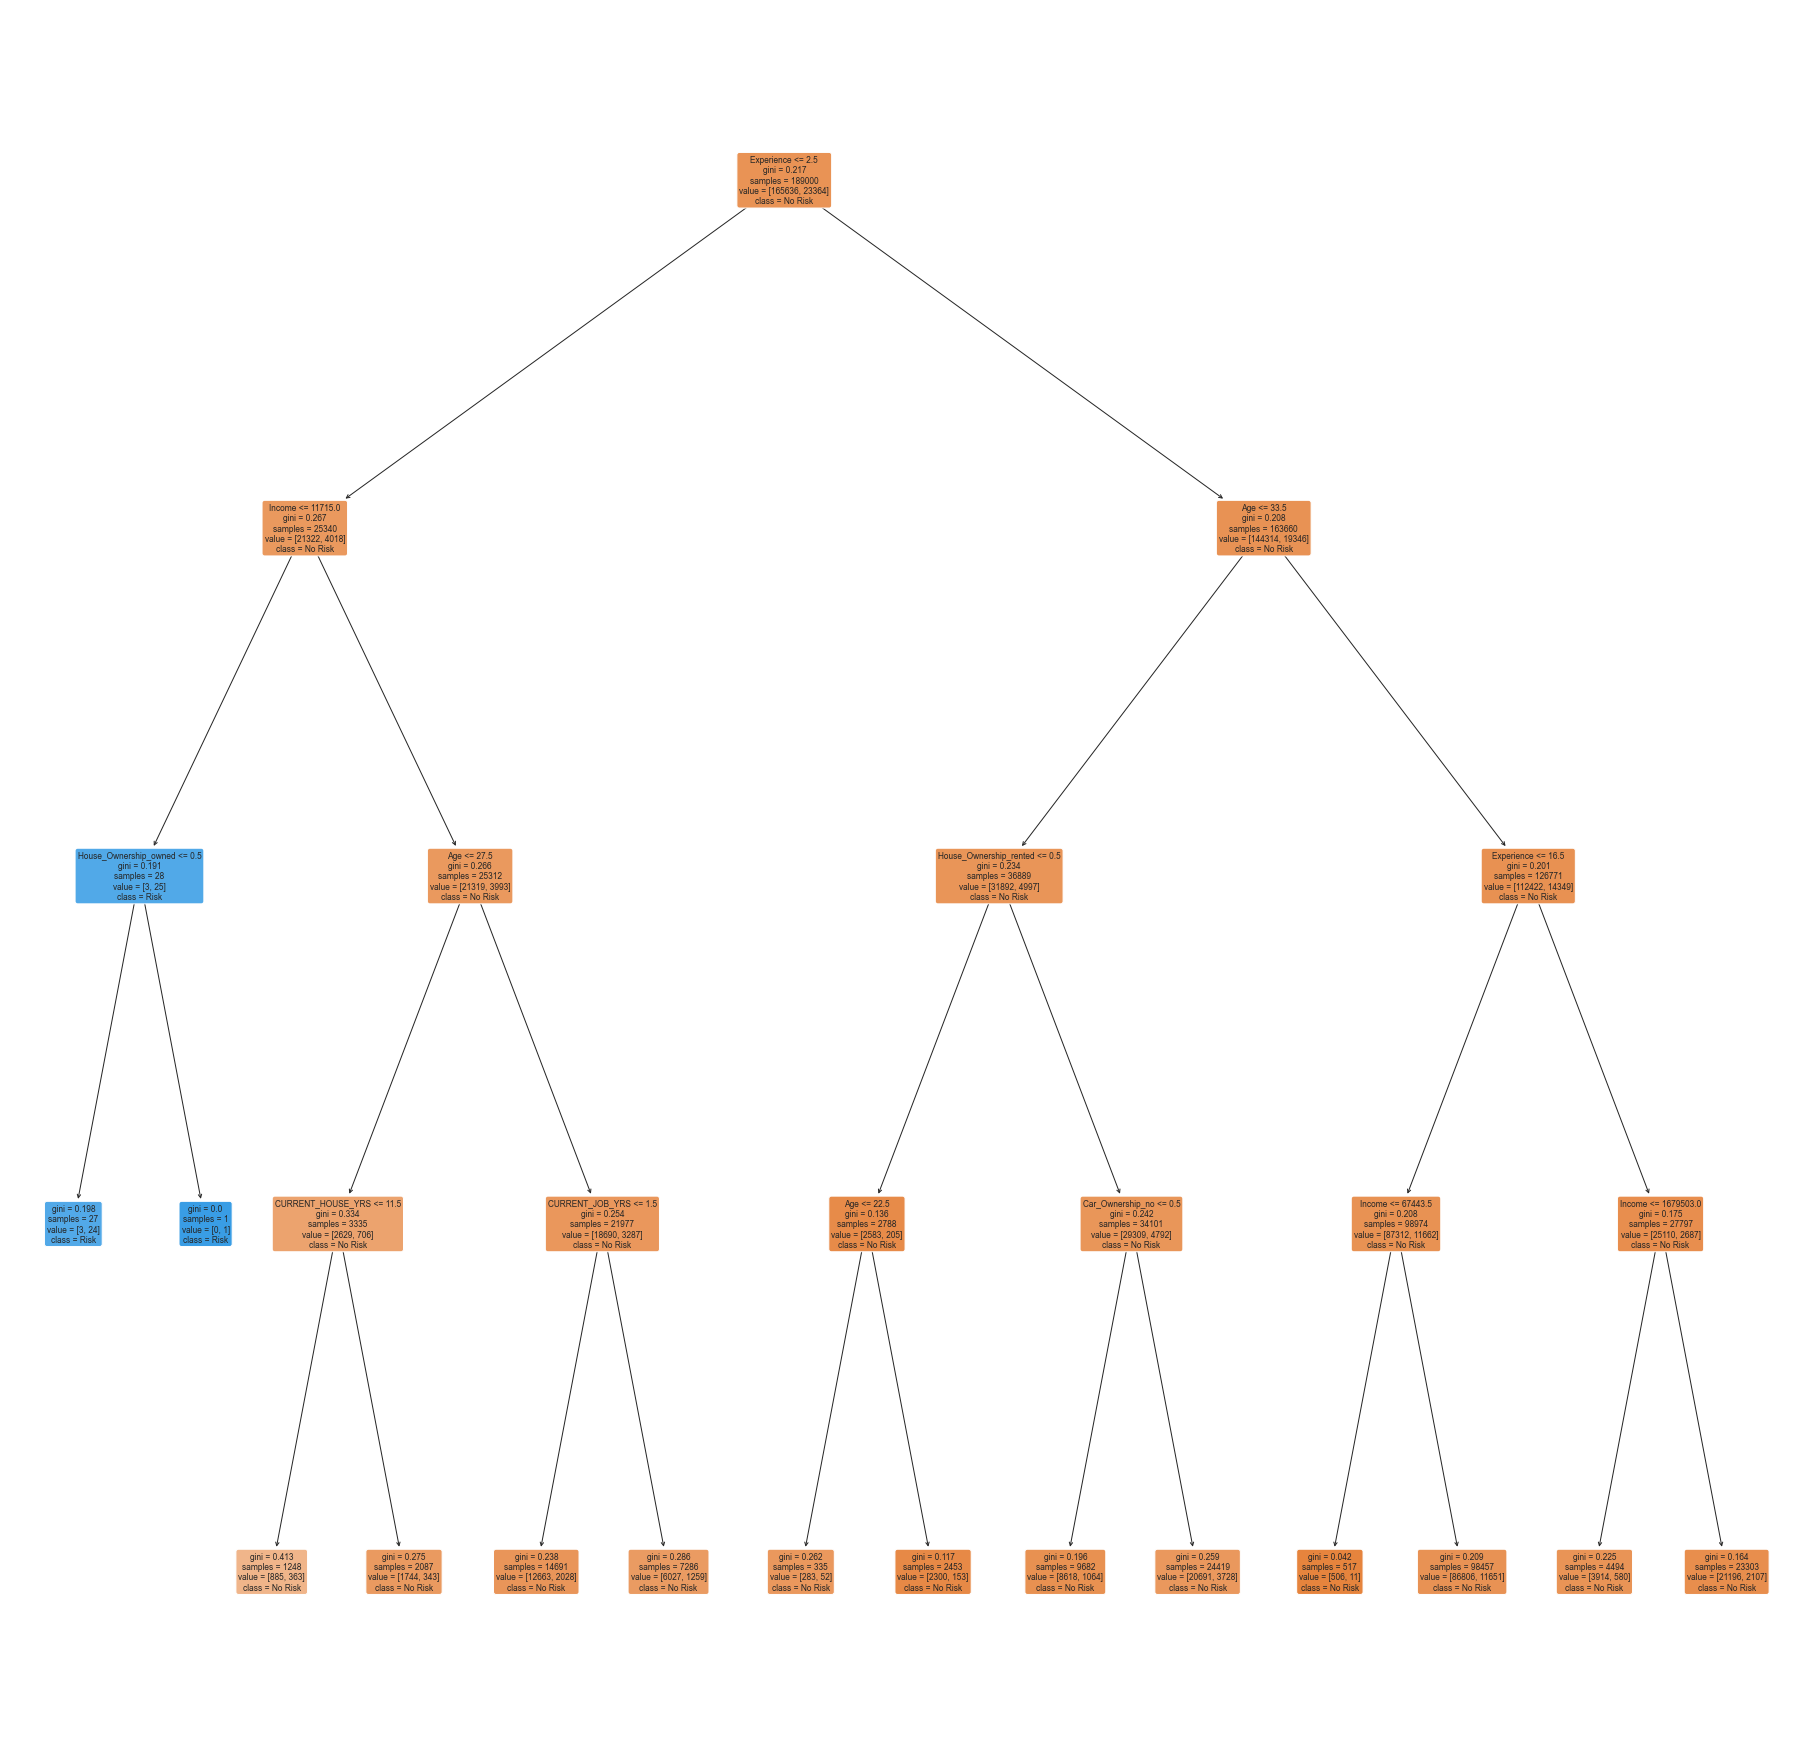

In [9]:
y = pd.DataFrame(riskData["Risk_Class"])
X = combined_data

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(32,32))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"])

### Checking the Accuracy of the Model

Train Data
Accuracy  :	 0.8764973544973546

TPR Train :	 0.0010700222564629343
TNR Train :	 0.9999818879953634

FPR Train :	 1.811200463667319e-05
FNR Train :	 0.9989299777435371

Test Data
Accuracy  :	 0.8789206349206349

TPR Test :	 0.0009171907756813418
TNR Test :	 0.9999458170784569

FPR Test :	 5.4182921543129604e-05
FNR Test :	 0.9990828092243187



Text(0.5, 1.0, 'Test')

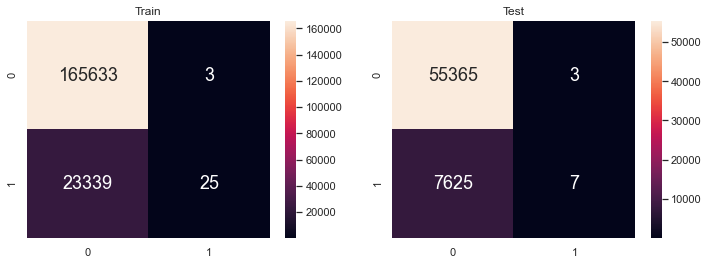

In [10]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################validation#####################################################

# Predict the Response corresponding to Predictors
y_vali_pred = dectree.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Looking at the classification tree of the data before upsampling, we can tell from the classification tree of the combined data(numeric and categorical) that `income` is the most important determinant of Risk_Flag.

However, from our exploratory data analysis, we have found out that there is a large imbalance in the Risk_Class. This results in a misleadingly high accuracy. The classification tree is unable to accurately classify Risk_Class since we have insufficient data on Risk in Risk_Class. We will need to upsample the data to give us a better sense of the accuracy. 

# Attempt 2 at creating a model
### Upsampling done to reduce imbalance in risk and no risk

In [11]:
# Upsample Bad to match Good
from sklearn.utils import resample

risk = pd.DataFrame(riskData["Risk_Class"])
combined_data = pd.concat([combined_data, risk], 
                           sort = False, axis = 1).reindex(index=combined_data.index)
# combined_data has OHE done, contains both numeric and categorical data
risk = combined_data[combined_data.Risk_Class == 'Risk']
no_risk = combined_data[combined_data.Risk_Class == 'No Risk']
 
# Upsample the Bad samples
risk_up = resample(risk, 
                        replace=True,                     # sample with replacement
                        n_samples=no_risk.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
combined_data_up = pd.concat([no_risk,risk_up])
 
# Check the ratio of the classes
combined_data_up['Risk_Class'].value_counts()

Risk       221004
No Risk    221004
Name: Risk_Class, dtype: int64

Risk is matched to no risk i.e. the total number of data is now larger.

In [12]:
combined_data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442008 entries, 0 to 9497
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        442008 non-null  int64  
 1   Age                           442008 non-null  int64  
 2   Experience                    442008 non-null  int64  
 3   CURRENT_JOB_YRS               442008 non-null  int64  
 4   CURRENT_HOUSE_YRS             442008 non-null  int64  
 5   Married/Single_married        442008 non-null  float64
 6   Married/Single_single         442008 non-null  float64
 7   House_Ownership_norent_noown  442008 non-null  float64
 8   House_Ownership_owned         442008 non-null  float64
 9   House_Ownership_rented        442008 non-null  float64
 10  Car_Ownership_no              442008 non-null  float64
 11  Car_Ownership_yes             442008 non-null  float64
 12  Risk_Class                    442008 non-null 

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Married/Single_married','Married/Single_single','House_Ownership_norent_noown','House_Ownership_owned','House_Ownership_rented','Car_Ownership_no','Car_Ownership_yes']])

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

f = plt.figure(figsize=(300,72))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"])

[Text(8381.573561946903, 3669.3, 'Experience <= 2.5\ngini = 0.5\nsamples = 331506\nvalue = [165543, 165963]\nclass = Risk'),
 Text(4143.335176991151, 3180.06, 'Age <= 31.5\ngini = 0.49\nsamples = 49511\nvalue = [21315, 28196]\nclass = Risk'),
 Text(2018.429203539823, 2690.82, 'CURRENT_JOB_YRS <= 0.5\ngini = 0.452\nsamples = 11013\nvalue = [3807, 7206]\nclass = Risk'),
 Text(1074.0265486725664, 2201.58, 'Income <= 8722290.0\ngini = 0.402\nsamples = 3962\nvalue = [1106, 2856]\nclass = Risk'),
 Text(592.566371681416, 1712.3400000000001, 'Age <= 22.5\ngini = 0.372\nsamples = 3769\nvalue = [932, 2837]\nclass = Risk'),
 Text(296.283185840708, 1223.1, 'CURRENT_HOUSE_YRS <= 12.5\ngini = 0.195\nsamples = 1104\nvalue = [121, 983]\nclass = Risk'),
 Text(148.141592920354, 733.8600000000001, 'Car_Ownership_yes <= 0.5\ngini = 0.121\nsamples = 895\nvalue = [58, 837]\nclass = Risk'),
 Text(74.070796460177, 244.6199999999999, 'gini = 0.111\nsamples = 884\nvalue = [52, 832]\nclass = Risk'),
 Text(222.21

### Checking the Accuracy of Model

Train Data
Accuracy  :	 0.5704119985761947

TPR Train :	 0.2918602339075577
TNR Train :	 0.8496704783651378

FPR Train :	 0.15032952163486224
FNR Train :	 0.7081397660924423

Test Data
Accuracy  :	 0.570161626033918

TPR Test :	 0.2874402717973874
TNR Test :	 0.8507419628207209

FPR Test :	 0.14925803717927913
FNR Test :	 0.7125597282026126



Text(0.5, 1.0, 'Test')

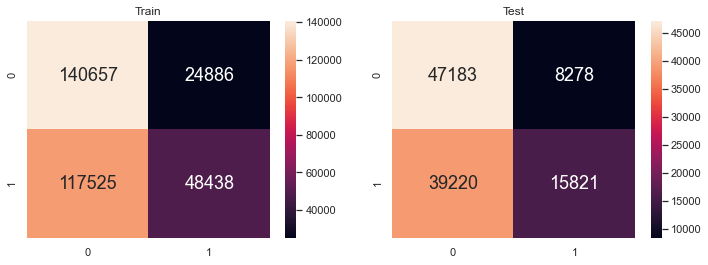

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################validation#####################################################

# Predict the Response corresponding to Predictors
y_vali_pred = dectree.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

After upsampling is done, the accuracy of the decision tree has expectedly decreased. Nonetheless, we can see that for the combined classification tree, `age` is the best determinant in determining if an individual will default a loan as it appears the most number of times in the decision tree. However, we need to take into consideration the low prediction accuracy, and more importantly, the high false negative rates (FNR) of the combined model. We need to be especially cautious of the high FNR as these are the individuals which are falsely identified as No Risk even though there is Risk when loaning them money.

# Attempt 3 at creating a model
### Random Forest done on top of upsampling

#### Attempt 3.1
Number of trees: 1000 | Maximum depth of each tree: 10

In [15]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [16]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.7365930028415776

TPR Train :	 0.6997757631287072
TNR Train :	 0.7734738240444418

FPR Train :	 0.22652617595555824
FNR Train :	 0.30022423687129285

Test Data
Accuracy  :	 0.7301768293786538

TPR Test :	 0.693311315961385
TNR Test :	 0.766852005632379

FPR Test :	 0.23314799436762104
FNR Test :	 0.3066886840386151


Text(0.5, 1.0, 'Test')

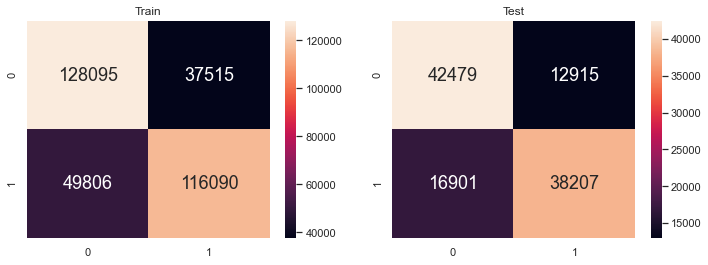

In [17]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_vali_pred = rforest.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

#### Attempt 3.2
Number of trees: 500 | Maximum depth of each tree: 20

In [18]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=500)

Train Data
Accuracy  :	 0.9492739196273974

TPR Train :	 0.9854653443832128
TNR Train :	 0.9131174133013332

FPR Train :	 0.08688258669866673
FNR Train :	 0.014534655616787285

Test Data
Accuracy  :	 0.9400372843930427

TPR Test :	 0.9812943919321899
TNR Test :	 0.8986605281760345

FPR Test :	 0.1013394718239655
FNR Test :	 0.01870560806781009


Text(0.5, 1.0, 'Test')

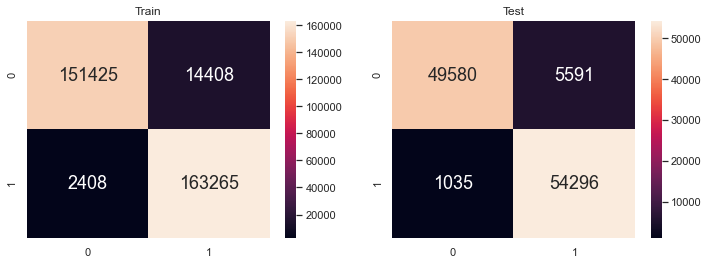

In [19]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_vali_pred = rforest.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

#### Attempt 3.3
Number of trees: 1000 | Maximum depth of each tree: 20

In [20]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000)

Train Data
Accuracy  :	 0.9490597455249679

TPR Train :	 0.984801880578435
TNR Train :	 0.9134347236861918

FPR Train :	 0.08656527631380816
FNR Train :	 0.015198119421565013

Test Data
Accuracy  :	 0.9393404644259833

TPR Test :	 0.9800983376258487
TNR Test :	 0.8981793048254788

FPR Test :	 0.10182069517452118
FNR Test :	 0.019901662374151252


Text(0.5, 1.0, 'Test')

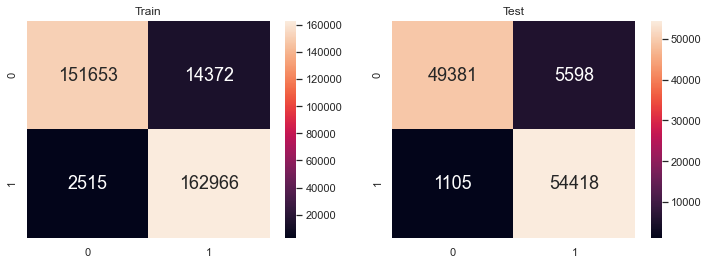

In [21]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_vali_pred = rforest.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Due to the size of our dataset, we were unable to run GridSearchCV to find the best depth and number of trees.

Through trial and error, we have realised that increasing the number of decision trees has little impact on the accuracy. However, increasing the depth increases the accuracy remarkably.

The large increase in accuracy from attempt 3.1 to 3.3 is due to the increase in depth and not the number of trees. Comparing attempts 3.2 and 3.3, we can see that an increase in the number of trees from 500 to 1000 did not lead to any significant improvement in our model accuracy. On the other hand, comparing attempts 3.1 and 3.2, even though we decreased the number of trees from 1000 to 500 and increased the depth from 10 to 20, there is a significant improvement in the classification accuracy from 0.73 to 0.94.

Having a max depth of 20 (with n_estimators set at 1000) has given us a very good accuracy and low FNR for both train and test datasets. 

#### Feature Importances on the best model (upsampled)

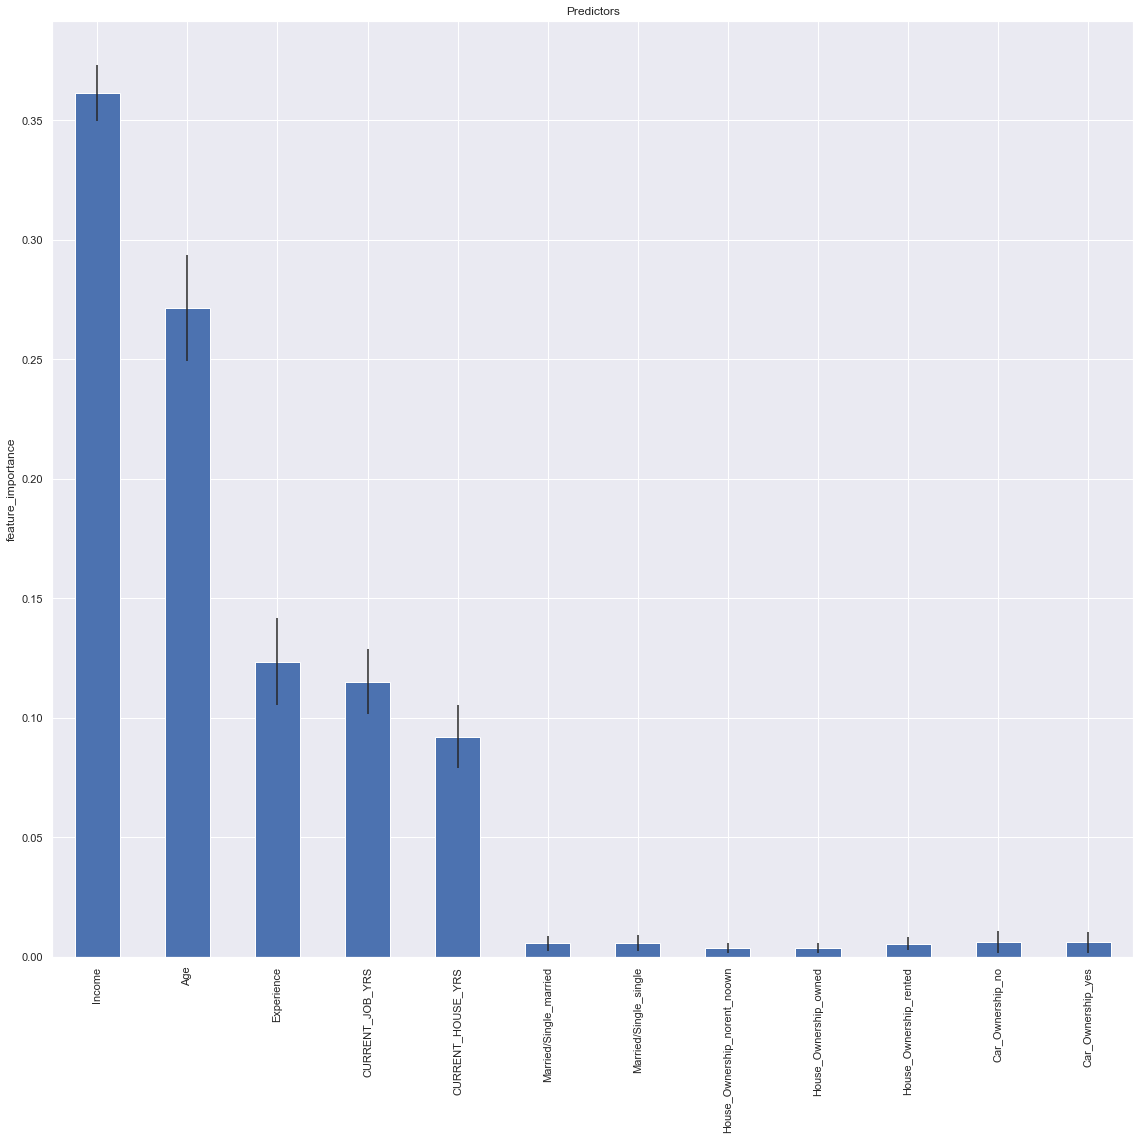

In [22]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)

feature_names = [f"{column_name}" for column_name, column in X.transpose().iterrows()]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Predictors")
ax.set_ylabel("feature_importance")
fig.tight_layout()

In order to find the most important feature in the dataset when predicting Risk_Class, we printed out a graph to show the order of importance of the variables. From the graph, it is clear that Income and Age are the most important variables while Car_Ownership and House_Ownership are not as important.

# Attempt 4 at creating a model
### Downsampling instead of upsampling

After some thought and research, we realised that upsampling our data may cause data leakage. Thus, we have decided to downsample our data to prevent data leakage. Since we still have a significant amount of data points after downsampling, it can be justified to do so.

In [23]:
combined_data.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Risk_Class
0,1303834,23,3,3,13,0.0,1.0,0.0,0.0,1.0,1.0,0.0,No Risk
1,7574516,40,10,9,13,0.0,1.0,0.0,0.0,1.0,1.0,0.0,No Risk
2,3991815,66,4,4,10,1.0,0.0,0.0,0.0,1.0,1.0,0.0,No Risk
3,6256451,41,2,2,12,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Risk
4,5768871,47,11,3,14,0.0,1.0,0.0,0.0,1.0,1.0,0.0,Risk


In [24]:
#in the upsampling cell, we have created variables 'risk' and 'no_risk' for the combined dataframe

# Downsample the No Risk samples
no_risk_down = resample(no_risk, 
                        replace=False,                     # sample with replacement
                        n_samples=risk.shape[0])    # to match number of Risk
 
# Combine the two classes back after upsampling
combined_data_down = pd.concat([risk,no_risk_down])
 
# Check the ratio of the classes
combined_data_down['Risk_Class'].value_counts()

No Risk    30996
Risk       30996
Name: Risk_Class, dtype: int64

`No Risk` is matched with `Risk` i.e. the total number (30996) of data is now larger.

In [25]:
combined_data_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61992 entries, 3 to 146476
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        61992 non-null  int64  
 1   Age                           61992 non-null  int64  
 2   Experience                    61992 non-null  int64  
 3   CURRENT_JOB_YRS               61992 non-null  int64  
 4   CURRENT_HOUSE_YRS             61992 non-null  int64  
 5   Married/Single_married        61992 non-null  float64
 6   Married/Single_single         61992 non-null  float64
 7   House_Ownership_norent_noown  61992 non-null  float64
 8   House_Ownership_owned         61992 non-null  float64
 9   House_Ownership_rented        61992 non-null  float64
 10  Car_Ownership_no              61992 non-null  float64
 11  Car_Ownership_yes             61992 non-null  float64
 12  Risk_Class                    61992 non-null  object 
dtype

### Random Forest done on top of downsampling
#### Attempt 4.1
Number of trees: 1000 | Maximum depth of each tree: 20

In [26]:
y = pd.DataFrame(combined_data_down['Risk_Class'])
X = pd.DataFrame(combined_data_down.drop('Risk_Class', axis = 1))

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000)

Train Data
Accuracy  :	 0.9476491590312729

TPR Train :	 0.9826327385838337
TNR Train :	 0.9129652632029811

FPR Train :	 0.08703473679701888
FNR Train :	 0.017367261416166242

Test Data
Accuracy  :	 0.8536585365853658

TPR Test :	 0.8258376863294687
TNR Test :	 0.882206824421493

FPR Test :	 0.11779317557850699
FNR Test :	 0.17416231367053128


Text(0.5, 1.0, 'Test')

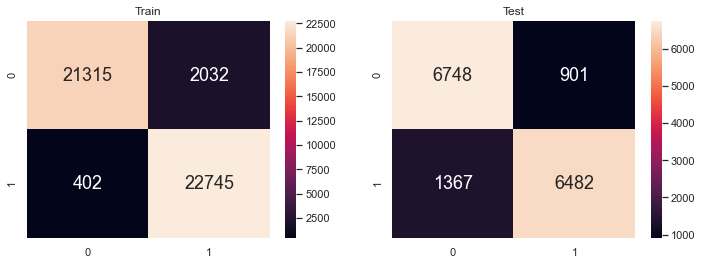

In [27]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_vali_pred = rforest.predict(X_vali)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_vali, y_vali))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmVali = confusion_matrix(y_vali, y_vali_pred)
tpVali = cmVali[1][1] # True Positives : Risk (1) predicted Risk (1)
fpVali = cmVali[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnVali = cmVali[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnVali = cmVali[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tpVali/(tpVali + fnVali)))
print("TNR Test :\t", (tnVali/(tnVali + fpVali)))
print()

print("FPR Test :\t", (fpVali/(fpVali + tnVali)))
print("FNR Test :\t", (fnVali/(fnVali + tpVali)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_vali, y_vali_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Since the dataset is now smaller, we can perform GridSearchCV to find the best combination of trees and depth.
Searching for best `max_depth` for rForest between 18 to 23, with `n_estimators` = from 100 to 1000 with jumps of 300.

In [28]:
from sklearn.model_selection import GridSearchCV
# Define the Hyper-parameter Grid to search on
param_grid = {'n_estimators': np.arange(100,1001,300),   # number of trees at 100 , 400, 700, 1000
              'max_depth': np.arange(18, 24)}             # depth of trees 18 to 23

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),  
                      param_grid,                
                      cv = 3,                     # 3-fold cross-validation
                      scoring = 'accuracy',
                      n_jobs = -1)      

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Risk_Class.ravel())

/Users/eecheerlee/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([18, 19, 20, 21, 22, 23]),
                         'n_estimators': array([ 100,  400,  700, 1000])},
             scoring='accuracy')

In [29]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=21, n_estimators=400)
0.8441734417344174


#### Attempt 4.2
Number of trees: 700 | Maximum depth of each tree: 23

In [30]:
y = pd.DataFrame(combined_data_down['Risk_Class'])
X = pd.DataFrame(combined_data_down.drop('Risk_Class', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 700,  # n_estimators denote number of trees
                                 max_depth = 23)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=23, n_estimators=700)

Train Data
Accuracy  :	 0.9546178001462554

TPR Train :	 0.996342670280969
TNR Train :	 0.9129144626499807

FPR Train :	 0.08708553735001935
FNR Train :	 0.0036573297190310226

Test Data
Accuracy  :	 0.8532713898567557

TPR Test :	 0.8278529980657641
TNR Test :	 0.8787291747384735

FPR Test :	 0.12127082526152654
FNR Test :	 0.172147001934236


Text(0.5, 1.0, 'Test')

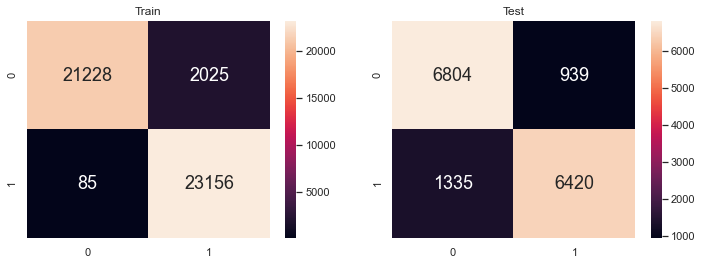

In [31]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Comparing the final upsampled model and the final downsampled model, the upsampled model might seem superior in terms of accuracy in predicting the test portion of the dataset and its FNR. However, the downsampled model has the advantage of testing on data that has not been manufactured (and only data that has been provided) (less data leakage).

A possibility that the upsampled model might be better in terms of accuracy and FNR might be due to the larger size of data that was trained on.

#### Feature Importances on the best model (downsampled)

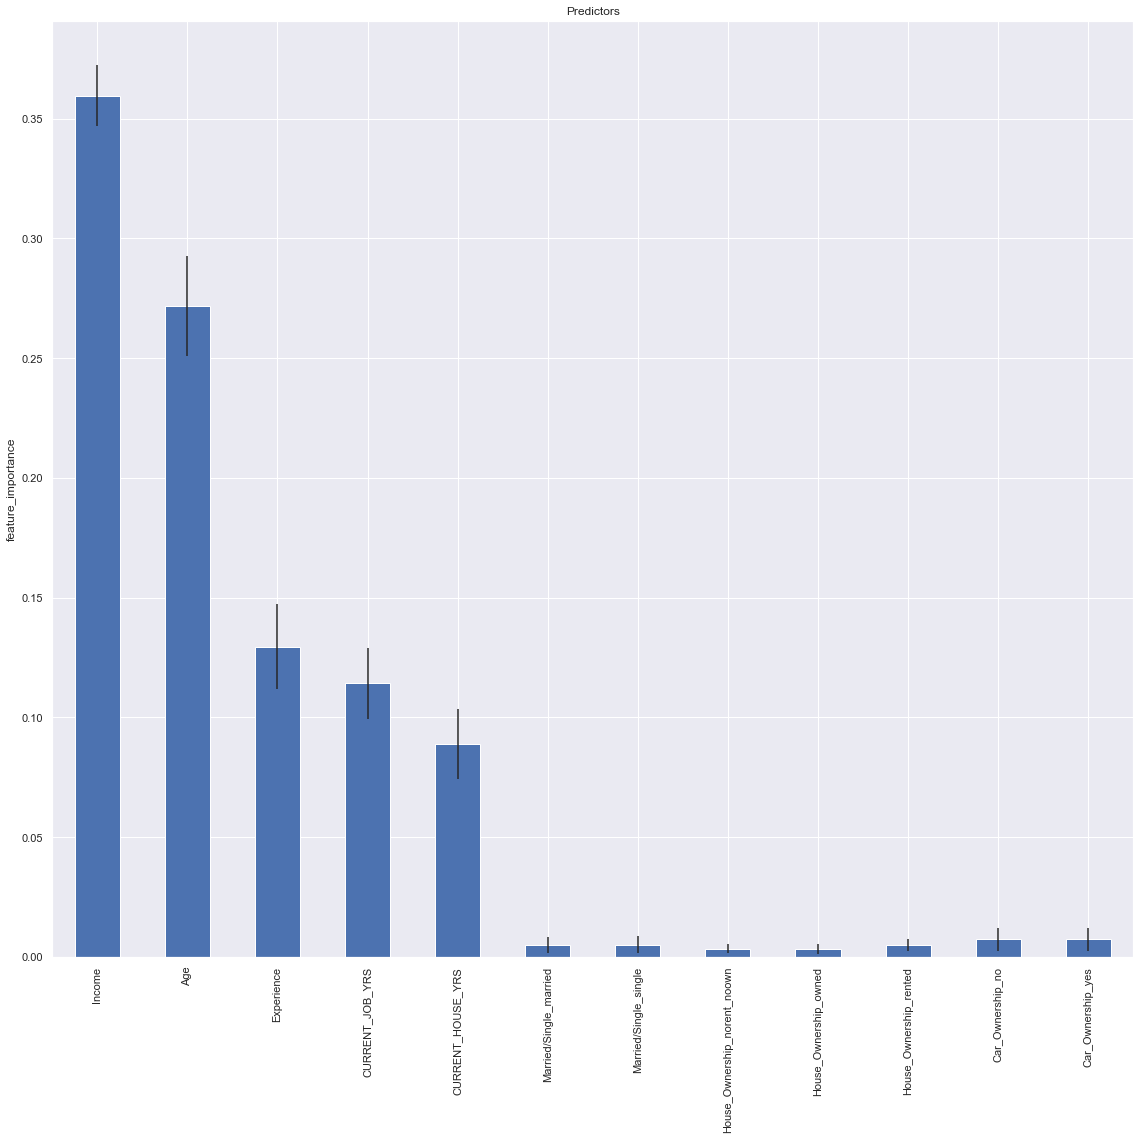

In [32]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)

feature_names = [f"{column_name}" for column_name, column in X.transpose().iterrows()]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Predictors")
ax.set_ylabel("feature_importance")
fig.tight_layout()

Comparing the graphs for feature importance for both upsampled and downsampled dataset, we can see that there is little differences in the ranking of the most important variable, `Income` which is closely followed by `Age`. Thus, when banks look at an individuals profile, Income and Age are the most important variables they should take note of.